# Linear Regression

## Hypothesis/function fits the data 

### X Train ---> $f$ ---> Y Train 

### $f$ here is the hypothesis. 

### Linear Regression tries to put a linear function out there. 

### Suppose 3 features are there in the model : $x_1$, $x_2$, $x_3$. 

### Then Linear Regression says that $y$ = $m_1 * x_1$ + $m_2 * x_2$ + $m_3 * x_3$ + $b$. 

### It decides importance of features in model by tuning m. 

### We don't know the values of $m_1$, $m_2$, ... and so on

### Linear Regression assumes linear relation between $x$ and $y$. 

### If we have $n$ features, then we need to find $n + 1$ values because of bias.

## Using Scilearn to implement Linear Regression

In [13]:
import numpy as np
import pandas as pd
data = np.loadtxt("data.csv", delimiter = ',')
print(data.shape)

(100, 2)


In [14]:
x = data[:, 0]
y = data[:, 1]
x, y

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100.]),
 array([ 30.,  29.,  31.,  16.,  24.,  29.,  28., 117.,  42.,  23.,  40.,
         15.,  18.,  51.,  15.,  19.,  30.,  25.,  17.,  55.,  20.,  12.,
         39.,  25.,  56.,  61.,  77.,  34.,  14.,   8.,  31.,  34.,  22.,
         12.,  52.,  50.,  24.,  20.,  91.,  33.,  27.,  25.,  83.,  12.,
         21.,  38.,  2

In [15]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)

#### X_Train is 1D, LR algo requires 2D
#### So we need to reshape it
#### X_train.reshape(-1, 1) means 1 column and any number of rows

In [20]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [21]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X_train, Y_train)

LinearRegression()

#### To view coefficient that the "fit" func has created - >

In [23]:
# m
alg1.coef_

array([-0.07857977])

#### To view intercept created for func - >

In [24]:
# c
alg1.intercept_

36.77490263054555

#### For training data

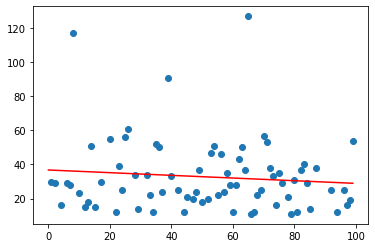

In [33]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(0, 100, 1)
y_line = m * x_line + c
plt.plot(x_line, y_line, 'r')
train_1d = X_train.reshape(75)
plt.scatter(X_train, Y_train)
plt.show()

#### For testing data

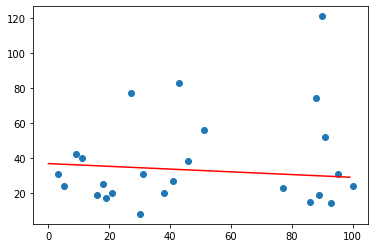

In [34]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(0, 100, 1)
y_line = m * x_line + c
plt.plot(x_line, y_line, 'r')
train_1d = X_test.reshape(25)
plt.scatter(X_test, Y_test)
plt.show()

## Coefficient of Determination

### Coefficient of determination is used to calculate the difference between the true values and the predicted values.

### The score is calculated as :
### $Score = 1 - u/v$
### where $u = \sum_{i=0}^{n} (y^T_i - y^P_i)^2$
### and $v =  \sum_{i=0}^{n} (y^T_i - y^T_{mean})^2$

### Ideally $Score$ lies between $0$ and $1$, with $1$ being the best.
### Predicting $y^P$ to be $y_{mean}$ is the worst case scenario. That simply means that we have taken all predicted values to be the mean; in which case the $Score$ is $0$.
### If $Score$ is negative, it implies that our prediction is worse than the mean.

### Scikit can calculate the $Score$ automatically using **"score"** 

In [35]:
Score_test = alg1.score(X_test, Y_test)
Score_train = alg1.score(X_train, Y_train)
Score_train, Score_test

(0.010263046018532673, -0.07377428509415895)

## Cost Function

### How does the Linear Regression model find the best fit line.

### We have to find an **"objective"** way of defining what is best.
### To find the best way, what we generally do is get to an error function.
### So given a line, we want to find out how much error is caused by it with respect to the given points.
### If we have this error function, we can try and find the line for which the error is minimum.

### How do we find the error function?
### Let's talk about a single point.
### $x_i$ and $y_i$ <--- $i^{th}$ data point. ($x_i$ may contain n features)
### Here $x_i$ is an input vector.
### $x_i = [x^1_i, x^2_i, x^3_i, ... , x^n_i]$
### For this $x_i$, the line that we will predict is $(m_1 * x^1_i + m_2 * x^2_i + m_3 * x^3_i + .... + m_n * x^n_i + c)$
### The **Error** for this particular points is:
### $y_i - (m_1 * x^1_i + m_2 * x^2_i + m_3 * x^3_i + .... + m_n * x^n_i + c)$
### The total **Error** is:
### $Error = \sum_{i=0}^{n} (y_i - (m_1 * x^1_i + m_2 * x^2_i + m_3 * x^3_i + .... + m_n * x^n_i + c))$

### There is a small error with the above formula.
### Errors belonging to either side of the predicted line will have different signs.
### One will lead to a positive error, while one will lead to a negative error; and they will cancel out each other.
### The net error will be less than the indiviual errors that we have seen so far. That is a bad idea since two points, on either side of the predicted line, even if far away from the line will cancel out the other (because one is highly positive error while the other is a highly negative error)  leading to low error scores even though the predicted line is far away from both points.

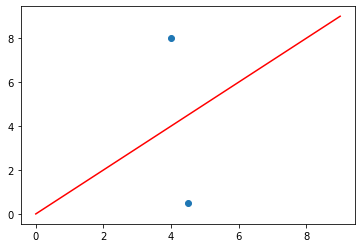

In [41]:
x_line1 = np.arange(0, 10, 1)
y_line1 = 1 * x_line + 0
x_line2 = np.arange(0, 10, 1)
y_line2 = 1.5 * x_line + 2
plt.plot(x_line1, y_line1, 'r')
X = [4, 4.5]
Y = [8, 0.5]
plt.scatter(X, Y)
plt.show()

#### In the above plot, although the net error is zero, the indiviual errors are not.

### A solution could be taking the absolute value for all errors, negative or positive.
### $Error = \sum_{i=0}^{n} \mathscr{abs}(y_i - (m * x_i + c))$
### where $m * x_i = (m_1 * x^1_i + m_2 * x^2_i + m_3 * x^3_i + .... + m_n * x^n_i)$
### Yet, there is a small problem with this. What we are doing here is that we are linearly punishing the error. If the error is small enough, it works for us. If the error is large, we want to punish it more. We don't want our error to be linearly calculated then.
### The sum of the errors for two points on either side of the line stays the same if the line lies between the two points (assuming that $m$ is kept constant). In reality however, some of the possible lines in between the two points are not well predicted.

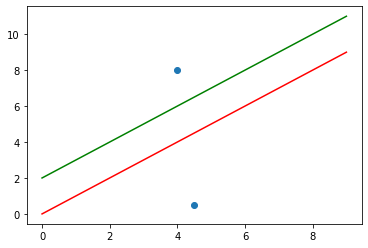

In [42]:
x_line1 = np.arange(0, 10, 1)
y_line1 = 1 * x_line + 0
x_line2 = np.arange(0, 10, 1)
y_line2 = 1 * x_line + 2
plt.plot(x_line1, y_line1, 'r')
plt.plot(x_line2, y_line2, 'g')
X = [4, 4.5]
Y = [8, 0.5]
plt.scatter(X, Y)
plt.show()

#### In the above plot, even though the $\mathscr{abs}$ errors for Line Red and Line Green are same, the Line Red is a better predictor than Green.

### A better solution is to use a non-linear function like the one below:
### $Error = \sum_{i=0}^{n} (y_i - (m * x_i + c))^2$
### where $m * x_i = (m_1 * x^1_i + m_2 * x^2_i + m_3 * x^3_i + .... + m_n * x^n_i)$
### This is going to make sure that large errors are punished more.
### Taking the above plot as an example, the Green line will now produce much larger errors than the Red line.
### Therefore this is the **Cost Function** that we are going to use.

### We'll now learn how to predict $m$ and $c$ given our **cost** function.
### For this example we'll assume that the given data is one-dimensional.
### $Cost = cost(m, c) = \sum_{i=0}^{n} (y_i - (m * x_i + c))^2$
### We will calculate $m$ and $c$ for the line $y = m * x + c$ so that the $Cost$ is minimized.
### To find out this out, we'll partially differentiate $cost(m, c)$ with respect to $m$ and $c$ and equate them to zero.
## 1. Differentiating partially with respect to m:
### ${\frac {\partial {cost}}{\partial {m}}} = 0$
### ${\frac {\partial {\sum_{i=0}^{n} (y_i - (m * x_i + c))^2}}{\partial m}} = 0$
### $\sum_{i=0}^{n} 2(y_i - (m * x_i + c)) * (-x_i) = 0$
### $\sum_{i=0}^{n} (x_i * y_i) - m\sum_{i=0}^{n} (x_i^2) - c\sum_{i=0}^{n} (x_i) = 0$
### Dividing both sides by n(number of points)
### $ {\frac {\sum_{i=0}^{n} (x_i * y_i)}{n}} - m{\frac {\sum_{i=0}^{n} (x_i^2)}{n}} - c{\frac {\sum_{i=0}^{n} (x_i)}{n}} = 0\dots\dots\dots\dots\dots\dots (i)$
### where ${\frac {\sum_{i=0}^{n} (x_i * y_i)}{n}}$ is $(x * y)_{mean}$, ${\frac {\sum_{i=0}^{n} (x_i^2)}{n}}$ is $(x^2)_{mean}$ and ${\frac {\sum_{i=0}^{n} (x_i)}{n}}$ is $(x)_{mean}$.
## 2. Differentiating partially with respect to c:
### ${\frac {\partial {cost}}{\partial {c}}} = 0$
### ${\frac {\partial {\sum_{i=0}^{n} (y_i - (m * x_i + c))^2}}{\partial c}} = 0$
### $\sum_{i=0}^{n} (y_i - (m * x_i + c)) * (-1) = 0$
### $\sum_{i=0}^{n} (y_i) - m\sum_{i=0}^{n} (x_i) - c\sum_{i=0}^{n} (1) = 0$
### Dividing both sides by n(number of points)
### $ {\frac {\sum_{i=0}^{n} (y_i)}{n}} - m{\frac {\sum_{i=0}^{n} (x_i)}{n}} - c{\frac {\sum_{i=0}^{n} (1)}{n}} = 0\dots\dots\dots\dots\dots\dots (ii)$
### where ${\frac {\sum_{i=0}^{n} (y_i)}{n}}$ is $(y)_{mean}$, ${\frac {\sum_{i=0}^{n} (x_i)}{n}}$ is $(x)_{mean}$ and ${\frac {\sum_{i=0}^{n} (1)}{n}}$ is $1$.

### From $eq$ $(i)$ and $(ii)$ we get the values of $m$ and $c$ for which $cost(m, c)$ is minimum.
### $xy_{mean} - mx^2_{mean} - cx_{mean} = 0 \dots\dots\dots (i)$
### $y_{mean} - mx_{mean} = c \dots\dots\dots (ii)$
### Replacing value of c from $(ii)$ in $(i)$ we get:
### $m = {\frac {xy_{mean} - x_{mean}*y_{mean}}{x^2_{mean} - x_{ mean}*x_{ mean}}}$
### $c$ can then be found from $eq (ii)$ 

## Coding Linear Regression for 1D data from scratch

### Implementing everything that we have learnt above, we shall now write our own code for Linear Regression

In [43]:
data = np.loadtxt('data.csv', delimiter = ',')
x = data[:, 0]
y = data[:, 1]
x.shape

(100,)

In [44]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.3)

In [45]:
x_train.shape

(70,)

In [47]:
def fit(x_train, y_train):
    num = (x_train * y_train).mean() - (x_train.mean() * y_train.mean())
    den = (x_train ** 2).mean() - (x_train.mean() * x_train.mean())
    m = num/den
    c = y_train.mean() - m * x_train.mean()
    return m, c

In [53]:
def predict(x, m, c):
    y_pred = m * x + c
    return y_pred

In [54]:
def score(y_truth, y_pred):
    u = sum((y_truth - y_pred) ** 2)
    v = sum((y_truth - y_test.mean()) ** 2)
    score = 1 - (u/v)
    print(score)

In [56]:
m, c = fit(x_train, y_train)
y_pred_test = predict(x_test, m, c)
print("Test Score:")
score(y_test, y_pred_test)
y_pred_train = predict(x_train, m, c)
print("Train Score:")
score(y_train, y_pred_train)
print("m, c = ", m, ",", c)

Test Score:
-0.07785471116439258
Train Score:
0.009284014349842828
m, c =  0.07470671559671521 , 30.411378708237724
